#### Load Dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
# Replace with the actual path to your file
file_path = '/content/drive/MyDrive/Deep_Dive_Project/uiuc-gpa.pk'

with open(file_path, 'rb') as f:
  df = pickle.load(f)

print(df.shape)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(58864, 512)


,Year,Number,Course Title,Avg GPA,A+,A,A-,B+,B,B-,...,"Primary Instructor_Wright, Margaret","Primary Instructor_Wu, Martin G","Primary Instructor_Yang, Xi","Primary Instructor_Yu, Albert","Primary Instructor_Zhang, Jianhua","Primary Instructor_Zhang, Li","Primary Instructor_Zhang, Zheng","Primary Instructor_Zhao, Kai","Primary Instructor_Zhao, Rui","Primary Instructor_Zilles, Craig"
0,2023,100,Intro Asian American Studies,3.530909,0,11,5,1,4,0,...,False,False,False,False,False,False,False,False,False,False
1,2023,100,Intro Asian American Studies,3.797391,0,17,2,1,2,1,...,False,False,False,False,False,False,False,False,False,False
2,2023,100,Intro Asian American Studies,3.476667,0,13,2,2,0,2,...,False,False,False,False,False,False,False,False,False,False
3,2023,200,U.S. Race and Empire,3.606364,6,15,5,2,3,0,...,False,False,False,False,False,False,False,False,False,False
4,2023,215,US Citizenship Comparatively,3.889091,16,12,2,1,1,1,...,False,False,False,False,False,False,False,False,False,False
5,2023,141,ABE Principles: Biological,3.098889,0,5,4,6,5,2,...,False,False,False,False,False,False,False,False,False,False
6,2023,152,Water in Global Environment,3.779427,55,115,0,4,9,0,...,False,False,False,False,False,False,False,False,False,False
7,2023,232,Context Intl Interventions,3.777778,3,13,5,5,1,0,...,False,False,False,False,False,False,False,False,False,False
8,2023,425,Engrg Measurement Systems,3.944167,0,22,0,2,0,0,...,False,False,False,False,False,False,False,False,False,False
9,2023,457,NPS Pollution Processes,3.758182,1,14,4,0,2,0,...,False,False,False,False,False,False,False,False,False,False


#### Number of Courses in Each Subject

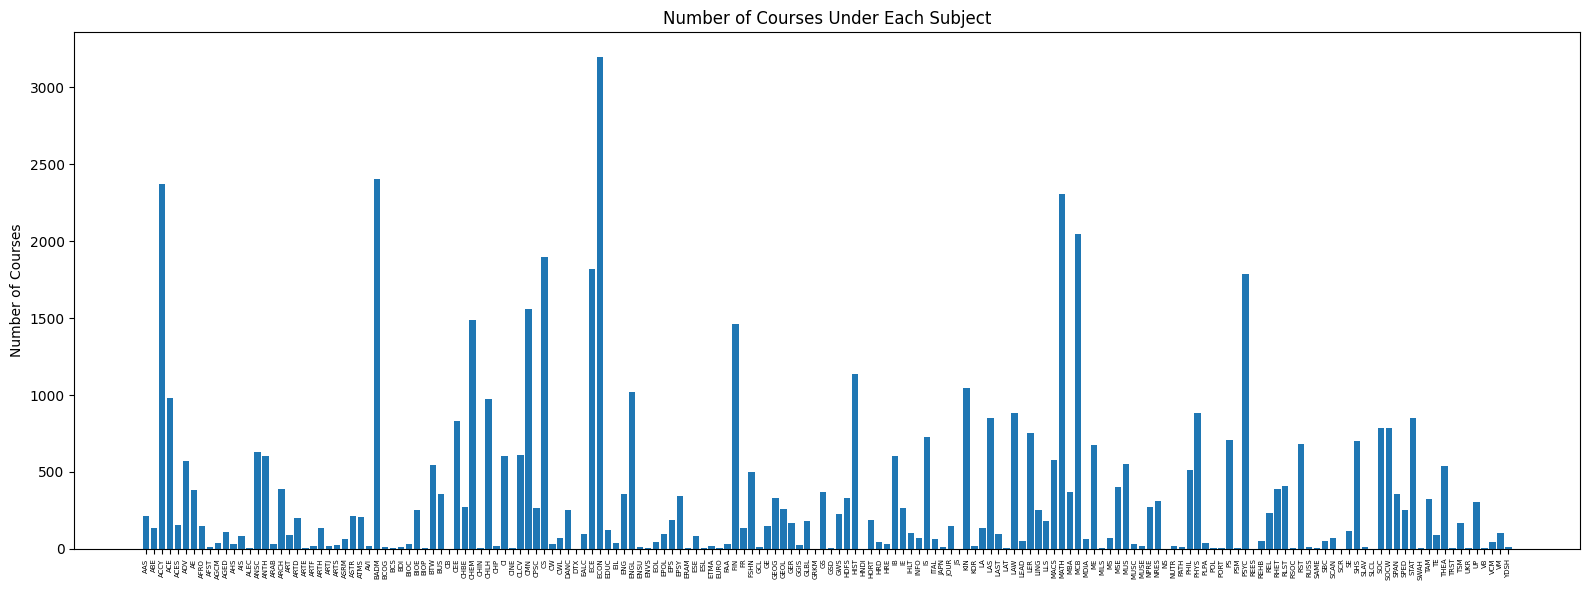

In [4]:
cols = df.columns.tolist()
subs = [col for col in cols if col.startswith('Subject_')]
sub_cnt = df[subs].sum()

subs = [sub.replace("Subject_", "") for sub in subs]

plt.figure(figsize=(16, 6))
plt.bar(subs, sub_cnt)
plt.title('Number of Courses Under Each Subject')
plt.ylabel('Number of Courses')
plt.xticks(rotation=90, fontsize=5, ha='center')
plt.tight_layout()

#### Average GPA of Each Subject

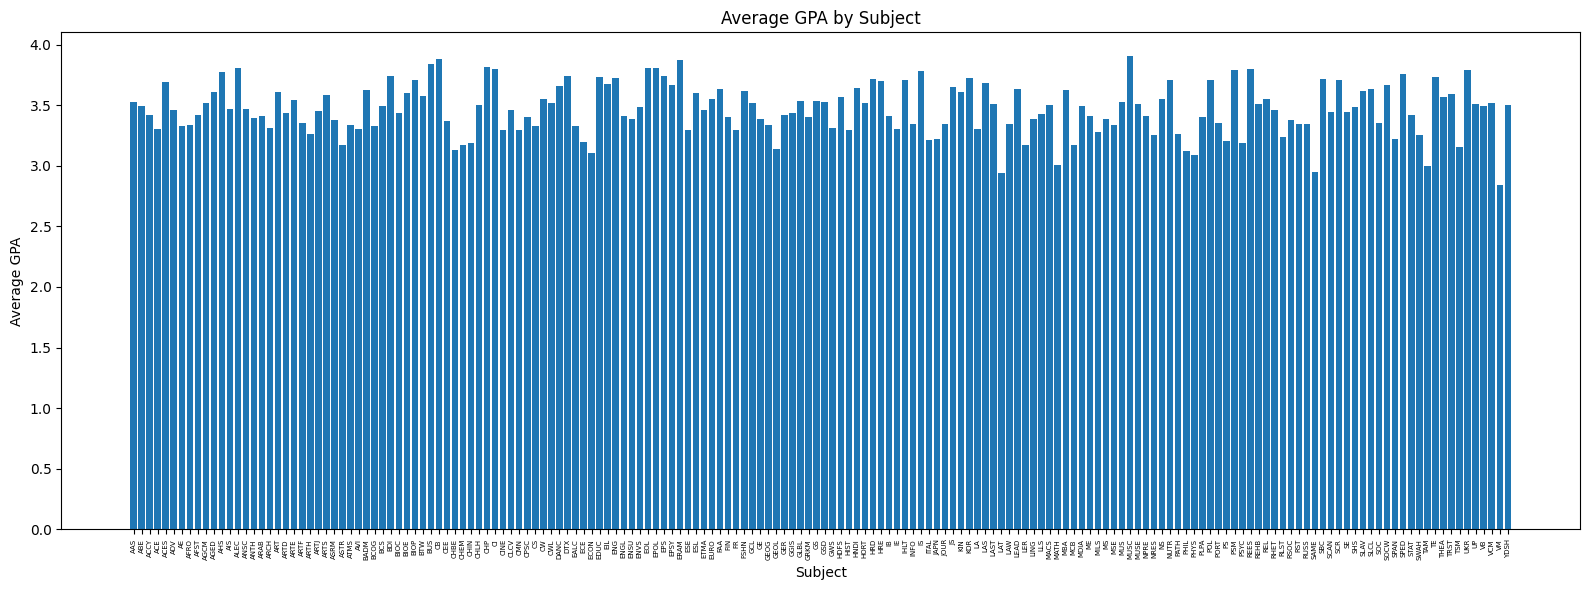

In [5]:
cols = df.columns.tolist()
subs = [col for col in cols if col.startswith('Subject_')]
avg_gpas = []

for sub in subs:
    avg_gpa = (df[sub] * df['Avg GPA']).sum() / df[sub].sum()
    avg_gpas.append(avg_gpa)

subs = [sub.replace("Subject_", "") for sub in subs]

plt.figure(figsize=(16, 6))
plt.bar(subs, avg_gpas)
plt.title('Average GPA by Subject')
plt.xlabel('Subject')
plt.ylabel('Average GPA')
plt.xticks(rotation=90, fontsize=5, ha='center')
plt.tight_layout()

#### Highest and Lowest 10 Average GPA Subjects

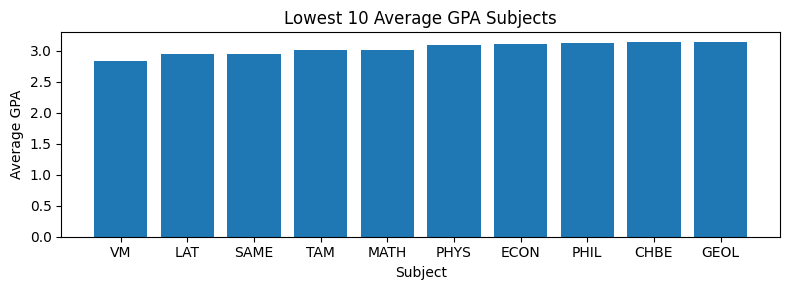

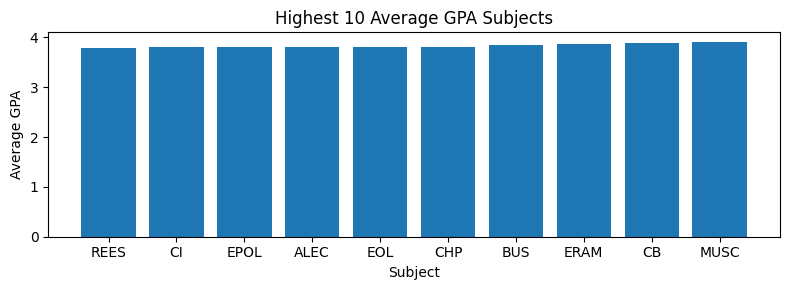

In [6]:
sorted_ids = np.argsort(avg_gpas)
subs = [subs[i] for i in sorted_ids]
avg_gpas = [avg_gpas[i] for i in sorted_ids]

lowest_subs = subs[:10]
lowest_10 = avg_gpas[:10]
highest_subs = subs[-10:]
highest_10 = avg_gpas[-10:]

subs = [sub.replace("Subject_", "") for sub in subs]

plt.figure(figsize=(8, 3))
plt.title('Lowest 10 Average GPA Subjects')
plt.xlabel('Subject')
plt.ylabel('Average GPA')
plt.bar(lowest_subs, lowest_10)
plt.tight_layout()

plt.figure(figsize=(8, 3))
plt.title('Highest 10 Average GPA Subjects')
plt.xlabel('Subject')
plt.ylabel('Average GPA')
plt.bar(highest_subs, highest_10)
plt.tight_layout()

#### Average GPA by Level of Course

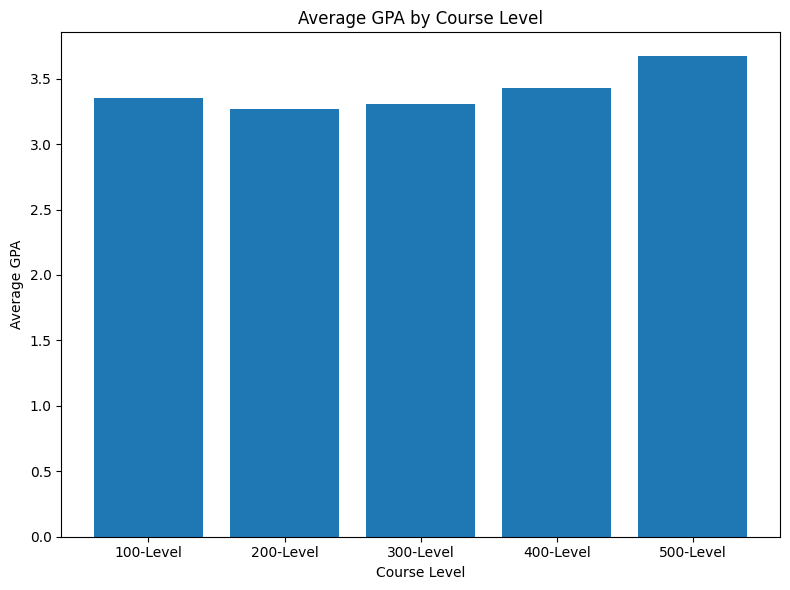

In [7]:
l100 = (100 <= df["Number"]) & (df["Number"] <= 199)
l200 = (200 <= df["Number"]) & (df["Number"] <= 299)
l300 = (300 <= df["Number"]) & (df["Number"] <= 399)
l400 = (400 <= df["Number"]) & (df["Number"] <= 499)
l500 = (500 <= df["Number"]) & (df["Number"] <= 599)

l100_gpa = df[l100]["Avg GPA"].mean()
l200_gpa = df[l200]["Avg GPA"].mean()
l300_gpa = df[l300]["Avg GPA"].mean()
l400_gpa = df[l400]["Avg GPA"].mean()
l500_gpa = df[l500]["Avg GPA"].mean()

plt.figure(figsize=(8, 6))
plt.bar(["100-Level", "200-Level", "300-Level", "400-Level", "500-Level"],
 [l100_gpa, l200_gpa, l300_gpa, l400_gpa, l500_gpa])
plt.title('Average GPA by Course Level')
plt.xlabel('Course Level')
plt.ylabel('Average GPA')
plt.tight_layout()

#### Average GPA by Semester

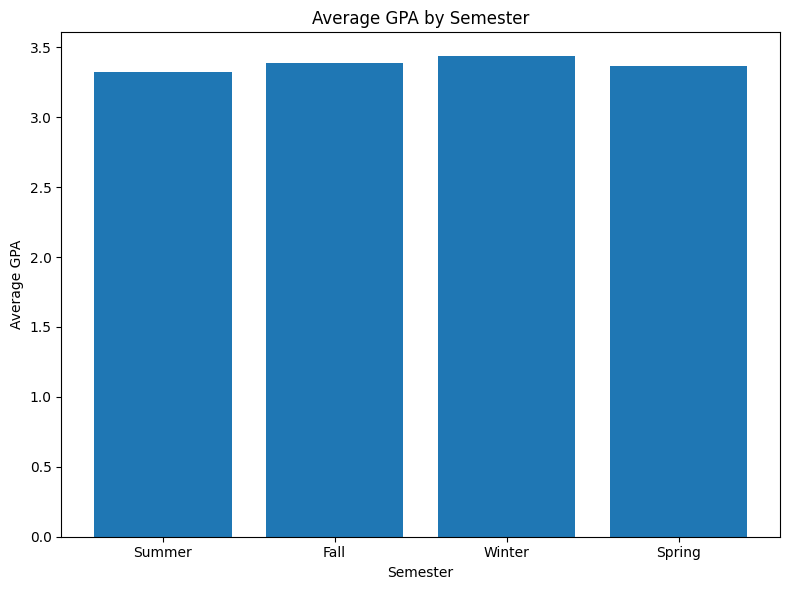

In [8]:
su = df["Term_Summer"]
fa = df["Term_Fall"]
wi = df["Term_Winter"]
sp = df["Term_Spring"]

su_gpa = df[su]["Avg GPA"].mean()
fa_gpa = df[fa]["Avg GPA"].mean()
wi_gpa = df[wi]["Avg GPA"].mean()
sp_gpa = df[sp]["Avg GPA"].mean()

plt.figure(figsize=(8, 6))
plt.bar(["Summer", "Fall", "Winter", "Spring"], [su_gpa, fa_gpa, wi_gpa, sp_gpa])
plt.title('Average GPA by Semester')
plt.xlabel('Semester')
plt.ylabel('Average GPA')
plt.tight_layout()

#### Average GPA by Year

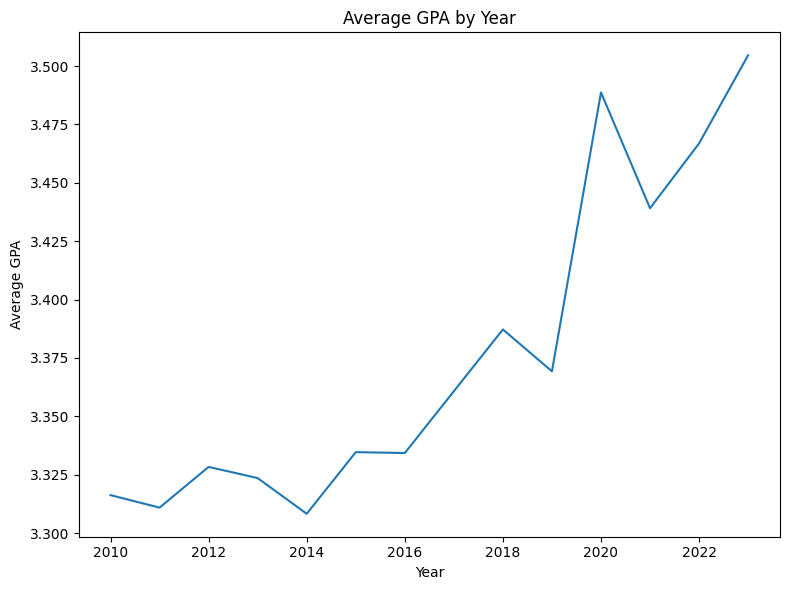

In [9]:
yrs = df["Year"].unique()
avg_gpas = []

for yr in yrs:
  this_yr = df["Year"] == yr
  avg_gpas.append(df[this_yr]["Avg GPA"].mean())

plt.figure(figsize=(8, 6))
plt.title('Average GPA by Year')
plt.xlabel('Year')
plt.ylabel('Average GPA')
plt.plot(yrs, avg_gpas)
plt.tight_layout()